In [1]:
using Plots
using BoundaryValueDiffEq
using QuadGK

# Lucas Schmidt Ferreira de Araujo

## Problem 01

$$ \epsilon y'' + 2 y' + y = 0 , \quad 0 < x < 1 , \quad 0 < \epsilon << 1 $$

$$ y(0) = 0 , y(1) = 1 $$

The solution is of the form

$$ y(x) = C_1 e^{ x r_1 }  + C_2 e^{ x r_2  } $$

With

$$ r_1 = \frac{-2 + \sqrt{4 - 4\epsilon} }{2\epsilon} $$

$$ r_2 = \frac{-2 - \sqrt{4 - 4\epsilon} }{2\epsilon} $$

From $I.V.P.$ we have 

$$ C_1 = ( e^{ r_1 } -  e^{ r_2 } )^{-1} \quad C_2 = -C_1 $$

Then  

$$ y''(x) = C_1 r_1^2 e^{xr_1} + C_2 r_2^2 e^{xr_2}$$

$$ \epsilon y''(x) =  \epsilon C_1 r_1^2 e^{xr_1} + \epsilon C_2 r_2^2 e^{xr_2}$$

### Outer Layer Solution

From the plots, we notice that $\epsilon y'' \rightarrow 0 , x \rightarrow 1$. Then an outter layer solution is

$$ 2 y'_0 + y_0 = 0$$

$$ y_0(1) = 1 $$

$$ y_0(x) = e^{\frac{1-x}{2}} $$

### Inner Layer Solution

We introduce the change of variables 

$$ \xi = \frac{x}{\delta(\epsilon)} , \quad Y(\xi) = y(\delta(\epsilon) \xi) $$

Then

$$ Y'(\xi) = y'(x) \delta(\epsilon) $$

$$ Y''(\xi) = y''(x) \delta(\epsilon)^2 $$

Then

$$ \frac{\epsilon}{ \delta(\epsilon)^2 } Y'' + \frac{2}{\delta(\epsilon)} Y' + Y = 0$$

Let's consider all possible dominant balance between coeffiecients

### $\frac{\epsilon}{\delta(\epsilon)^2} \approx \frac{2}{\delta(\epsilon)}$

Then 

$$ \delta(\epsilon) \approx \frac{ \epsilon }{2} \implies \frac{\epsilon}{\delta(\epsilon)^2} , \frac{2}{\delta(\epsilon)} >> 1 $$

### $ \frac{\epsilon}{\delta(\epsilon)^2} \approx 1$

Then

$$ \delta(\epsilon) \approx \sqrt{\epsilon} \implies 1 << \frac{2}{\delta(\epsilon)} $$

We chose $\delta(\epsilon) \approx \frac{\epsilon}{2}$

Then

$$ \frac{4}{\epsilon} Y'' + \frac{4}{\epsilon} Y' + Y = 0 $$

$$ Y'' + Y' + \frac{ \epsilon }{4} Y = 0 , \implies  Y_0'' + Y_0' = 0$$

$$ Y(0) = 0 $$

The unperturbed solution is

$$ Y_0(\xi) = C_1 + C_2 e^{-\xi}$$
$$ Y_0(\xi) = C_1( 1- e^{-\xi} ) = C_1( 1- e^{-2x/\epsilon} ) $$

$$ y_{inr}(x) = C_1( 1- e^{-2x/\epsilon} ) $$

### Matching

We expect that

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x), \quad x = \eta \sqrt{\epsilon} $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = e^{1/2} $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x) = C_1 $$

$$ C_1 =  e^{1/2}  $$

The solution is then

$$ y_(x) = y_{out}(x) + y_{inr}(x) - y_{cmn}(x) , \quad y_{cmn} = e^{1/2} $$

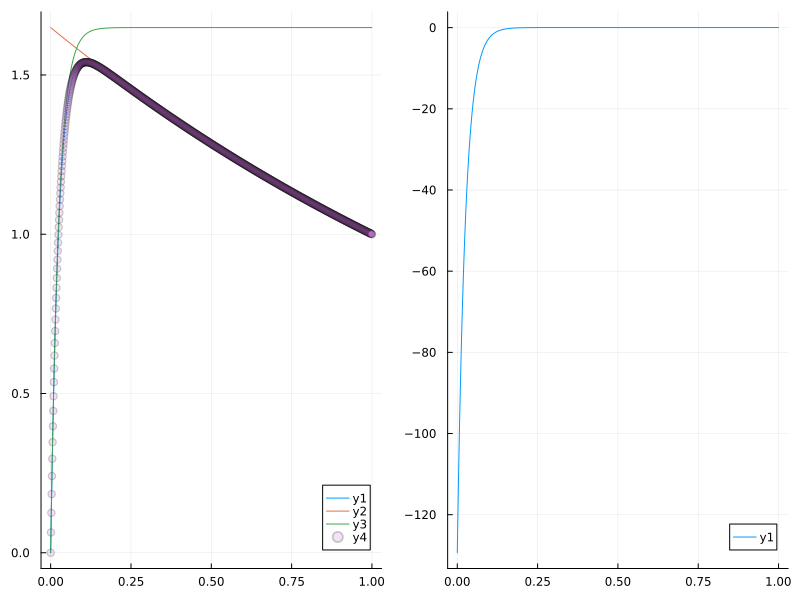

In [8]:
function y_analytical(x,ϵ)
    r1 = ( -2 + ( 4 - 4*ϵ )^(.5) ) / (2*ϵ)
    r2 = ( -2 - ( 4 - 4*ϵ )^(.5) ) / (2*ϵ)

    C1 = 1 / ( exp( r1 )  - exp( r2 )  )
    C2 = - C1
    return C1 * exp( x * r1 ) + C2 * exp( x * r2 )
end

function ϵd2ydx2(x,ϵ)
    r1 = ( -2 + ( 4 - 4*ϵ )^(.5) ) / (2*ϵ)
    r2 = ( -2 - ( 4 - 4*ϵ )^(.5) ) / (2*ϵ)

    C1 = 1 / ( exp( r1 )  - exp( r2 )  )
    C2 = - C1
    return ϵ * C1 * r1^2 * exp( x * r1 ) +  ϵ * C2 * r2^2 * exp( x * r2 )
end

function y_out(x,ϵ)
    return exp( (1-x)/2 )
end

function y_inr(x,ϵ)
    return exp(1/2) * (1 - exp(-2*x/ϵ) )
end

function y_u(x,ϵ)
    return y_out(x,ϵ) + y_inr(x,ϵ) - exp(1/2)
end


ϵ = .05
x = range(0,1,1000)

p1 = plot(x , y_analytical.(x , ϵ) )
plot!( x , y_out.(x,ϵ) )
plot!( x , y_inr.(x,ϵ) )
scatter!( x , y_u.(x,ϵ) , alpha = .2)
p2 = plot(x , ϵd2ydx2.(x , ϵ) )

plot(p1,p2 , size=(800,600))

# Problem 02

1. 
$$ \epsilon y'' + x^{1/3} y' + y = 0$$

$$ y(0) = 0 ,\quad y(1) = e^{-3/2} $$

### Outer Layer Solution

We solve the 1 order ODE

$$ x^{1/3} y' + y = 0 $$

$$ y(1) = e^{-3/2} $$

The solution is

$$ y_{out} = e^{-\frac{3}{2}x^{2/3}} $$

### Inner Layer Solution

We introduce

$$ g(x) = \xi \delta(\epsilon) , \quad Y(\xi) = y(x) $$

$$ \frac{dy}{dx} = \frac{g'(x)}{\delta(\epsilon)}\frac{dY}{d\xi} $$

$$ \frac{d^2y}{dx^2} = \frac{g''(x)}{\delta(\epsilon)}\frac{dY}{d\xi} + (\frac{g'(x)}{\delta(\epsilon)})^2 \frac{d^2Y}{d\xi^2}$$

Then

$$  \epsilon \frac{g''(x)}{\delta(\epsilon)} Y' + \epsilon (\frac{g'(x)}{\delta(\epsilon)})^2 Y'' + x^{1/3} \frac{g'(x)}{\delta(\epsilon)} Y'+ Y = 0$$

Chosing $ \delta(\epsilon) = \epsilon$, we have

$$ (g'(x))^2 Y'' + \epsilon Y'g''(x) + x^{1/3} g'(x) Y' + \epsilon Y = 0 $$

The first term in assymptotic expansion is

$$ (g'(x))^2 Y_0'' + x^{1/3} g'(x) Y_0' = 0$$

If we chose $x^{1/3} = g'(x), g(0) = 0$ we have

$$ Y_0'' + Y_0' = 0 $$

$$ Y_0(0) = 0 $$

The solution is 

$$ Y_0(\xi) = C_1(1 - e^{-\xi}) $$

Then

$$ g(x) - g(0) = \int_{0}^{x} s^{1/3}ds = \frac{3}{4} x^{4/3} $$

$$ y_{inr} = C_1(1 - exp(-\frac{3}{4\epsilon} x^{4/3} ) ) $$


### Matching

We expect that

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x) $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = 1 $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x) = C_1 $$

$$ C_1 =  1  $$

In [22]:
function odes!(du, u, p, x)
    ε = p[1]  
    du[1] = u[2]                            
    du[2] = -(x^(1/3) * u[2] + u[1]) / ε          
end

function bc!(residual, u, p, x)
    residual[1] = u[:, 1][1]- 0.0   
    residual[2] = u[:, end][1] - exp(-3/2)
end

function y_out(x,ϵ)
    return exp( - x^(2/3) *  3/2  )
end

function y_inr(x,ϵ)
    return (1 - exp(-3* x^(4/3) / (4*ϵ) ) )
end

function y_u(x,ϵ)
    return y_out(x,ϵ) + y_inr(x,ϵ) - 1
end


xspan = (0.0, 1.0) 
initial_guess = [0.0, 0.0]      

ϵ = 0.001                        
bvp = BVProblem(odes!, bc!, initial_guess, xspan, [ϵ])
sol = solve(bvp, MIRK4() , dt = 0.01 )
x = sol.t
y_num = [q[1] for q in sol.u];

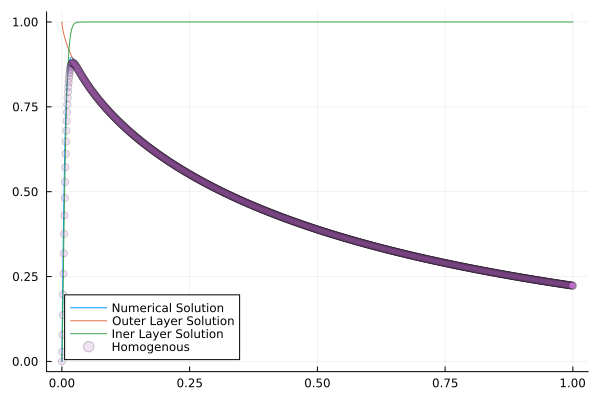

In [25]:
plot( x , y_num , label = "Numerical Solution")
plot!( x , y_out.(x,ϵ) , label = "Outer Layer Solution")
plot!( x , y_inr.(x,ϵ) , label = "Iner Layer Solution")
scatter!( x , y_u.(x,ϵ) , label = "Homogenous" , alpha = .2)

b.)

$$ \epsilon y'' - (2x + 1) y' + 2y = 0 $$

$$ y(0) = 1 , \quad y(1) = 0 $$

### Outer Layer Soulution

The Boundary Layer is at $x=1$. Then the OLS is 

$$ (2x + 1)y' - 2y = 0$$

$$ y(0) = 1$$

Then

$$ y_{out} = 2x + 1$$

### Inner Layer Solution

We consider

$$ x = 1 - \xi \delta(\epsilon) , \quad Y(\xi) = y(x) $$

Then

$$ Y'(\xi) = - y'(x) \delta(\epsilon) $$

$$ Y''(\xi) = y''(x) \delta(\epsilon)^2 $$

Also, chosing $\delta(\epsilon) = \epsilon$ we have

$$ \frac{1}{\epsilon}Y'' + \frac{2-2\epsilon \xi + 1}{\epsilon}Y' + 2Y = 0$$

$$ Y'' + (3 - 2\epsilon \xi) Y' + 2\epsilon Y = 0$$

The first term in assymptotic expansion is

$$ Y_0'' + 3Y_0' = 0$$

$$ Y_0(0) = 0$$

Then

$$ Y_0(\xi) = C_1(1 - e^{-3\xi})$$

$$ y_{inr} = C_1(1 - e^{\frac{3(x-1)}{\epsilon}}) $$

### Matching

We expect that

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x), \quad x = \eta \sqrt{\epsilon} $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = 3 $$

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x) = C_1 $$

$$ C_1 =  3  $$

In [37]:
function odes!(du, u, p, x)
    ε = p[1]  
    du[1] = u[2]                            
    du[2] = ( (2*x+1) * u[2] - 2* u[1]) / ε          
end

function bc!(residual, u, p, x)
    residual[1] = u[:, 1][1]- 1.0   
    residual[2] = u[:, end][1] - 0.0 
end

function y_outer(x,ϵ)
    return 2*x + 1
end

function y_inr(x,ϵ)
    return 3*(1 - exp( 3*(x-1)/ϵ ) )
end

function y_u(x,ϵ)
    return y_inr(x,ϵ) + y_outer(x,ϵ) - 3
end;

In [39]:
xspan = (0.0, 1.0) 
initial_guess = [0.0, 0.0]      

ϵ = 0.1                        
bvp = BVProblem(odes!, bc!, initial_guess, xspan, [ϵ])
sol = solve(bvp, MIRK4() , dt = 0.01 )
x = sol.t
y_num = [q[1] for q in sol.u];

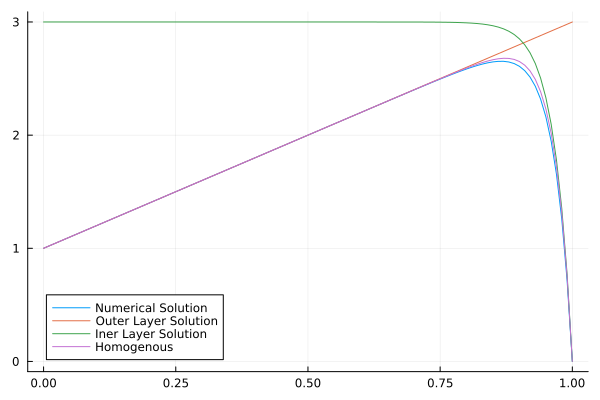

In [40]:
plot( x , y_num , label = "Numerical Solution")
plot!( x , y_outer.(x,ϵ) , label = "Outer Layer Solution")
plot!( x , y_inr.(x,ϵ) , label = "Iner Layer Solution")
plot!( x , y_u.(x,ϵ) , label = "Homogenous")

## Problem 03

$$ \epsilon y'' - g(x) y' = f(x)$$

$$ y(0) = 0 , \quad y(1) = -1$$

### Inner Layer Solution

We introduce

$$ h(x) = \xi \delta(\epsilon) , \quad Y(\xi) = y(x) $$

$$ \frac{dy}{dx} = \frac{h'(x)}{\delta(\epsilon)}\frac{dY}{d\xi} $$

$$ \frac{d^2y}{dx^2} = \frac{h''(x)}{\delta(\epsilon)}\frac{dY}{d\xi} + (\frac{h'(x)}{\delta(\epsilon)})^2 \frac{d^2Y}{d\xi^2}$$

Chosing $ \delta(\epsilon) = \epsilon$, we have

$$ \frac{1}{\epsilon}Y'' h'(x)^2 + h''(x) Y' - \frac{g(x)h'(x)}{\epsilon}Y' = f(x)$$

$$ Y'' h'(x)^2 -g(x)h'(x)Y' + \epsilon( h''(x)Y' -f ) = 0$$

The first term in assymptotic expansion is

$$ Y_0'' h'(x)^2 -g(x)h'(x)Y_0'= 0$$

If we chose $ h'(x) = g(x)$ , we have

$$ Y_0'' - Y_0'= 0$$

with solution

$$ Y_0(\xi) = C_1 + C_2 e^{\xi}$$

$$ y_{inr}(x) = C_1 + C_2 exp(  \frac{1}{\epsilon} \int_{C}^{x} g(s)ds ) $$

We want the solution to be boundade. Since $g(s) \geq 0$ This can only happen if

$$ \int_{C}^{x} g(s)ds \leq 0 \implies C = 1 $$

For $x$ sufficiently close to $1$, we have

$$\int_{1}^{x} g(s)ds = \xi \epsilon$$

This way

$$ y_{inr}(1) = C_1 + C_2 = -1 $$

$$ y_{inr} = C_1 -(C_1 + 1) exp( -\frac{1}{\epsilon} \int_{x}^{1} g(s)ds )  $$

### Outter Solution Layer

The outer solution is given by

$$ g(x) y' + f(x) = 0$$

$$ y(0) = 0$$

The solution is given by

$$ y(x) = -\int_{0}^{x} \frac{f(s)}{g(s)} ds $$

### Matching

We expect that

$$ \lim_{\epsilon \rightarrow 0^{+}} y_{out}(x) = \lim_{\epsilon \rightarrow 0^{+}} y_{inr}(x) $$

$$ C_1  = -\int_{0}^{1} \frac{f(s)}{g(s)} ds$$

In [11]:
function f(x)
    return cos(x)#x^3
end

function g(x)
    return x^2 + 1
end

function div(x)
    return f(x)/g(x)
end

function odes!(du, u, p, x)
    ε = p[1]  
    du[1] = u[2]                            
    du[2] = ( g(x) * u[2] + f(x) ) / ε          
end

function y_outer(x,ϵ)
    return -quadgk( div, 0,x )[1]
end

function y_inr(x,ϵ)
    C1 = -quadgk(div, 0 , 1)[1]
    int = quadgk( g, x,1 )[1]
    return C1 - (C1+1) * exp( -int/ϵ )
end

function y_u(x,ϵ)
    return y_outer(x,ϵ) + y_inr(x,ϵ) + quadgk(div, 0 , 1)[1]
end
function bc!(residual, u, p, x)
    residual[1] = u[:, 1][1]- 0.0   
    residual[2] = u[:, end][1] + 1.0 
end

bc! (generic function with 1 method)

In [14]:
xspan = (0.0, 1.0) 
initial_guess = [0.0, 0.0]      

ϵ = 0.01                        
bvp = BVProblem(odes!, bc!, initial_guess, xspan, [ϵ])
sol = solve(bvp, MIRK4() , dt = 0.01 )
x = sol.t
y_num = [q[1] for q in sol.u];

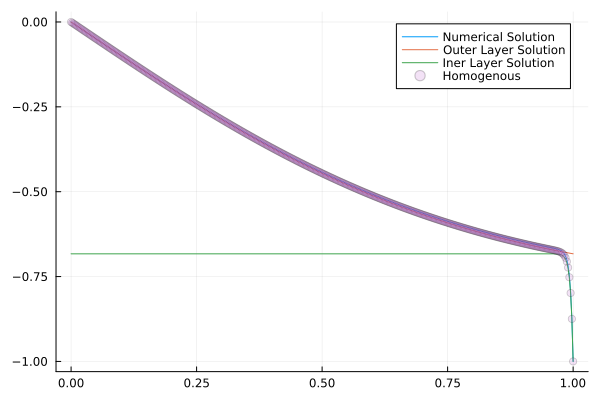

In [ ]:
plot( x , y_num , label = "Numerical Solution")
plot!( x , y_outer.(x,ϵ) , label = "Outer Layer Solution")
plot!( x , y_inr.(x,ϵ) , label = "Iner Layer Solution")
scatter!( x , y_u.(x,ϵ) , label = "Homogenous" , alpha = .2)